# Directory

### 01. Import Libraries
### 02. Import Data
### 03. Customer Profiling
### 04. Customer Profile Visualizations
### 05. Profile Connections: Regions and Departments
### 06. General Visualizations
### 07. Exporting Data Frame and Visualizations

## 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

## 02. Import Data

In [2]:
#Data set imported from DI 4.10 Part I
df_full = pd.read_pickle(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\02 Data\Prepared Data\ICB_full_merge.pkl')

## 03. Customer Profiling

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32435059 entries, 0 to 32435058
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float64
 1   user_id                 float64
 2   order_number            float64
 3   orders_day_of_week      float64
 4   hour_of_order           float64
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                float64
 11  department_id           float64
 12  prices                  float64
 13  max_order               float64
 14  loyalty_flag            object 
 15  mean_price              float64
 16  spending_flag           object 
 17  med_dspo                float64
 18  frequent_shopper        object 
 19  Gender                  object 
 20  state                   object 
 21  Age                     int64

In [3]:
#Pulling Data Dictionary
data_dict = pd.read_pickle(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\02 Data\Prepared Data\departments_t.pkl')
data_dict = data_dict.to_dict('index')
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [8]:
df_full['fam_status'].value_counts()

married                             22777499
single                               5330885
divorced/widowed                     2774460
living with parents and siblings     1552215
Name: fam_status, dtype: int64

In [9]:
df_full.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_shopper,Gender,state,Age,date_joined,dependants,fam_status,income,region,exclusion_flag
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,Soda,...,non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,0
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,...,non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,0
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,...,non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,0
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,...,non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,0
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,...,non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,1


In [6]:
# Creating General Profile
df_full.loc[df_full['dependants'] == 0, 'parent'] = 'Non-Parent'
df_full.loc[df_full['dependants'] != 0, 'parent'] = 'Parent'
#Creating Sub-Profile for Age
df_full.loc[(df_full['parent'] == 'Parent') & (df_full['Age'] <= 25),'young_parent'] = 'Young Parent'
# Age 25 is typically considered to be the max age for young parents.
df_full.loc[(df_full['parent'] == 'Parent') & (df_full['Age'] > 25),'young_parent'] = 'Over 25'

In [7]:
df_full['parent'].value_counts()

Parent        24329714
Non-Parent     8105345
Name: parent, dtype: int64

In [8]:
df_full['young_parent'].value_counts()

Over 25         21279066
Young Parent     3050648
Name: young_parent, dtype: int64

## 04. Profile Visualizations

<Axes: >

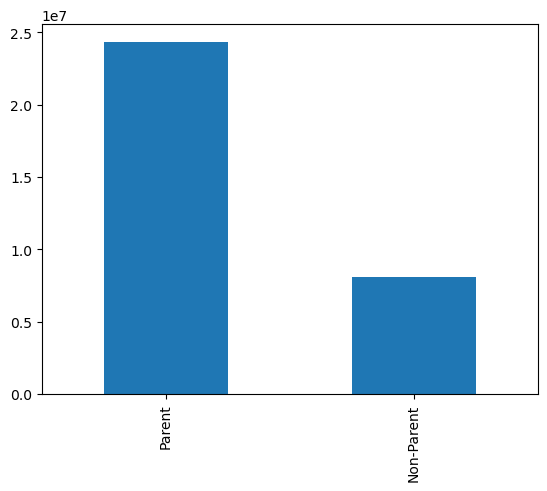

In [9]:
parent_counts = df_full['parent'].value_counts().plot.bar()
parent_counts

A majority of Instacart users are parents.

<Axes: >

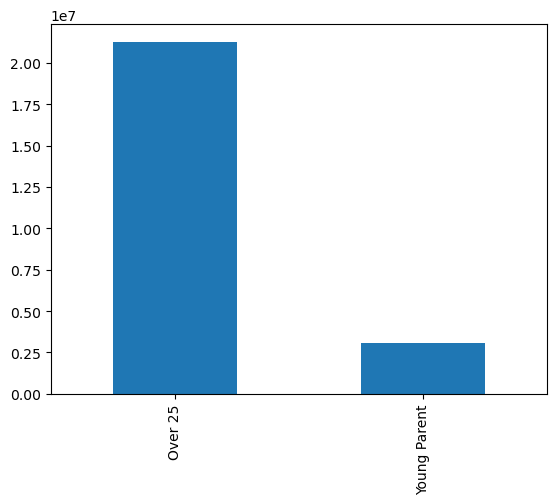

In [10]:
parent_order_com = df_full['young_parent'].value_counts().plot.bar()
parent_order_com

According to these visualizations, a majority of orders are placed by parents. Only a small number of orders are placed by young parents.

In [11]:
df_full.groupby('parent')['hour_of_order'].describe().T

parent,Non-Parent,Parent
count,8.105345e+06,2.432971e+07
mean,1.343286e+01,1.342235e+01
std,4.253339e+00,4.244025e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+01
50%,1.300000e+01,1.300000e+01
75%,1.600000e+01,1.600000e+01
max,2.300000e+01,2.300000e+01


The average order time for both parents and non-parents is 1:00 PM.

In [12]:
df_full.groupby('young_parent')['income'].describe().T

young_parent,Over 25,Young Parent
count,2.127907e+07,3.050648e+06
mean,1.034716e+05,7.069420e+04
std,4.347231e+04,2.470130e+04
min,2.591100e+04,2.593700e+04
25%,7.073300e+04,5.612700e+04
50%,1.014540e+05,6.961900e+04
75%,1.329710e+05,8.495400e+04
max,5.939010e+05,3.963640e+05


Significant difference between the average income of parents above age 25 and young parents.

## 05. Profile Connections - Regions and Departments

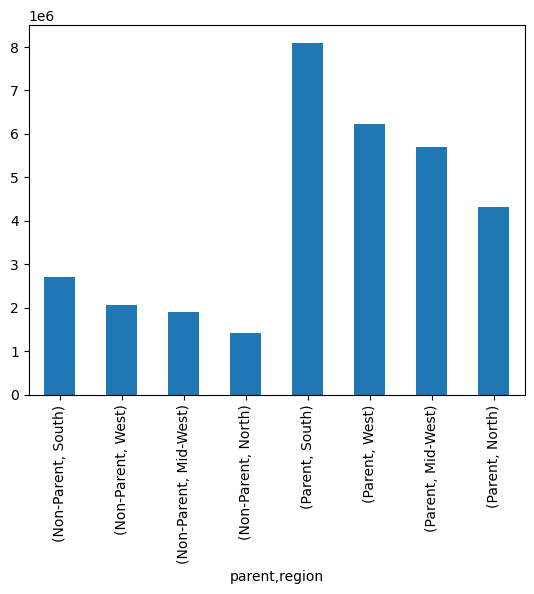

In [13]:
reg = df_full.groupby('parent')['region'].value_counts().plot.bar()

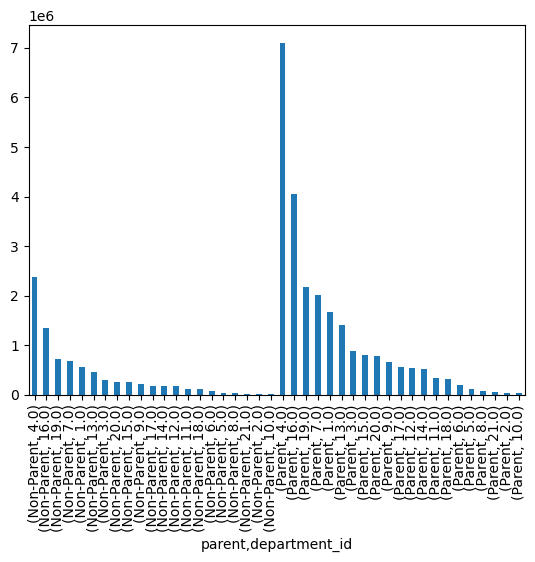

In [14]:
p_dep = df_full.groupby('parent')['department_id'].value_counts().plot.bar()

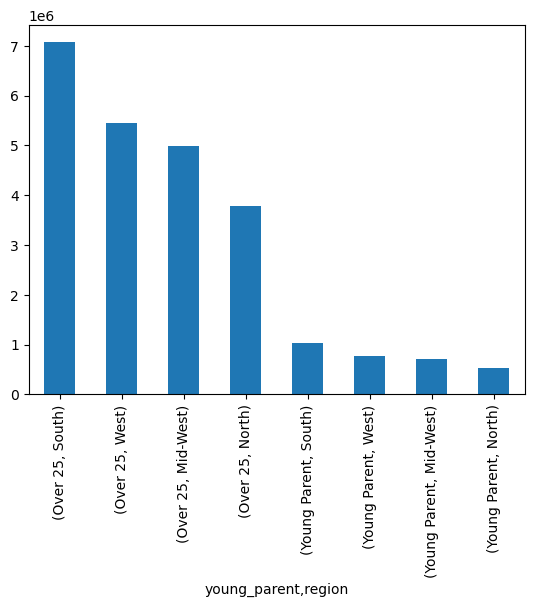

In [15]:
reg_2 = df_full.groupby('young_parent')['region'].value_counts().plot.bar()

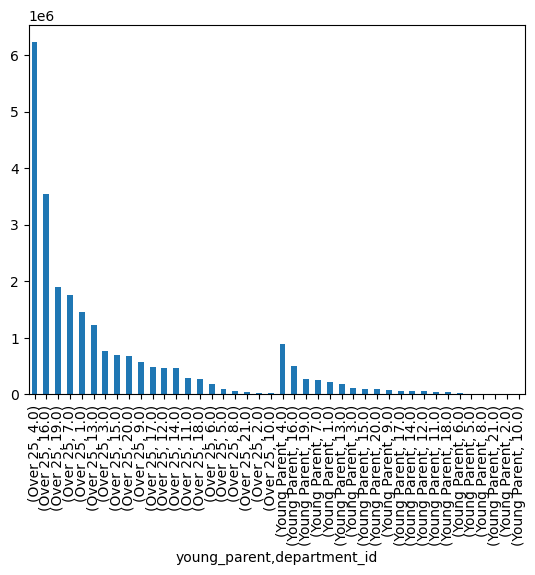

In [16]:
p_dep_2 = df_full.groupby('young_parent')['department_id'].value_counts().plot.bar()

The visualizations show that parents ages 26 and up make up the majority of Instacart orders. There also appears to be less of a gap between young parents in each region than their older counterparts.

## 06. General Visualizations

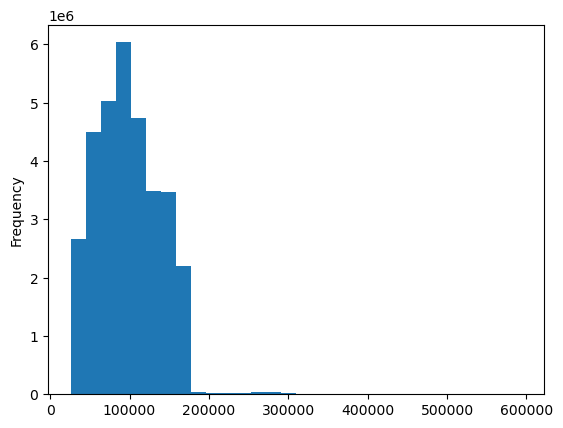

In [17]:
hist = df_full['income'].plot.hist(bins = 30) #creates histogram for income

This histogram shows the range of incomes of InstaCart customers. Results suggest that customers are primarily middle to upper-middle class.

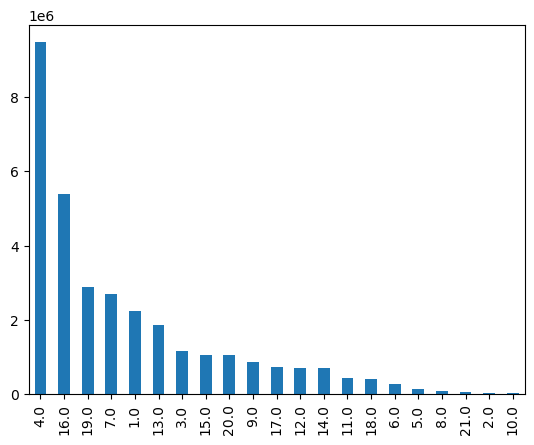

In [18]:
deps = df_full['department_id'].value_counts().plot.bar() 
#makes a bar chart of the number of times each department appears in the data set which shows which departments recieve the most orders

The produce, dairy and eggs, and snacks departments make up the largest number of orders.

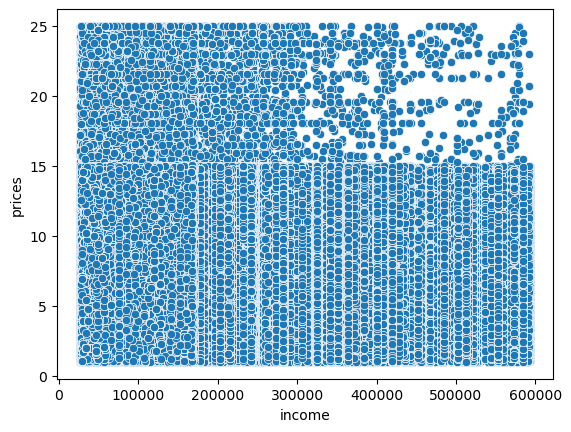

In [24]:
scat_ip = sns.scatterplot(x = 'income', y = 'prices', data = df_full) #creating scatter plot of income and prices

Interestingly, the highest orders of high priced items come from customers making less than $300000. Customers with higher incomes purchase the more expensive items less.

In [19]:
#line graph prep
np.random.seed(8)
dev = np.random.rand(len(df_full)) <= 0.7 #using standard 70/30 split

In [20]:
# creating samples
big = df_full[dev]
small = df_full[~dev]

In [21]:
line_df = small[['income','Age']] #narrowing sample

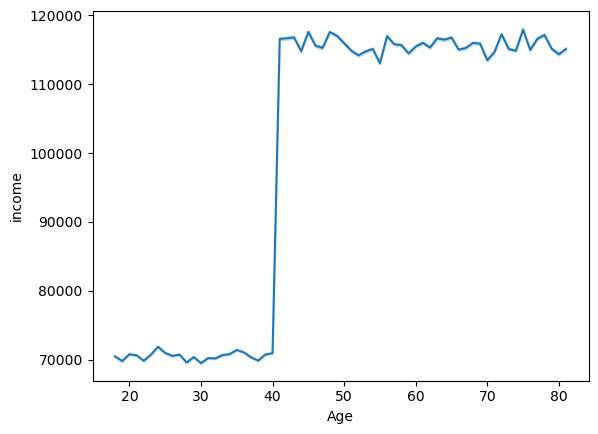

In [22]:
line = sns.lineplot(data = line_df, x = 'Age',y = 'income') #creating line graph Age/Income

In [21]:
line_df = small[['Age']] #creating new line graph for Age/count of age

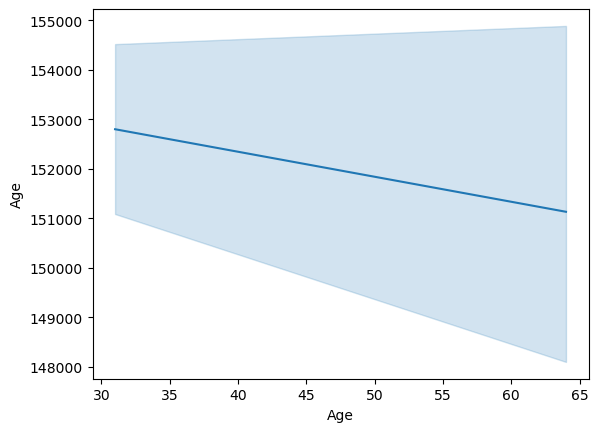

In [23]:
lineA = sns.lineplot(data = line_df, x = 'Age',y = line_df['Age'].value_counts())

The combination of these two line graphs suggest that the lowest earning population makes up a majority of the customer base.

## 07. Export

In [19]:
#exporting data frame
df_full.to_pickle(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\02 Data\Prepared Data\ICB_full_merge.pkl')

In [20]:
#export profile visualizations
parent_counts.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\parents.png')
parent_order_com.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\orders_parents_young.png')
reg.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\parent_region.png')
p_dep.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\parent_department.png')
reg_2.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\y_parent_region.png')
p_dep_2.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\y_parent_department.png')

In [ ]:
#export general vizualizations
hist.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\income_hist.png')
deps.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\department_orders.png')
scat_ip.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\income_prices.png')
line.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\income_age.png')
lineA.figure.savefig(r'C:\Users\jmanc\OneDrive\Desktop\InstaCart Basket Analysis\04 Analysis\Visualizations\age_count.png')